In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.cluster import KMeans

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


In [2]:
#basic data management libraries
import pandas as pd
import numpy as np
import pylab as pl
import re
from urllib.request import urlopen
import requests
from requests import get
import time
from time import sleep
from random import randint

#algorithms used
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import mixture
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from bs4 import BeautifulSoup
from sklearn.svm import SVC  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


#helper libraries to take metrics and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.utils.multiclass import unique_labels
from scipy.spatial.distance import cdist

#libraries to visualize data
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
# Helper function to print confusion matrix and other stats on each model

def stats(y_true, y_pred):
    
    conf_mat = confusion_matrix(y_true, y_pred)
    sns.set(font_scale=1.2)#for label size
    sns.heatmap(conf_mat, annot=True,annot_kws={"size": 16},)# font size

    
    stats = precision_recall_fscore_support(y_true, y_pred, average = 'weighted')
    print('\nprecision')
    print(stats[0])
    print('recall')
    print(stats[1])
    print('f1 score')
    print(stats[2])
    print('\n')
    


In [4]:
data = pd.read_csv('/Users/jiezou/Documents/GitHub/DataMining_project/v9/Version8.csv')
data.head()

,Unnamed: 0,id,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,neighbourhood_cleansed,zipcode,latitude,...,price,security_deposit,cleaning_fee,minimum_nights,maximum_nights,number_of_reviews,instant_bookable,cancellation_policy,senti_score,walk_score
0,0,958,1,90.0,1,1.0,1,4,94117.0,37.76931,...,170.0,100.0,$100.00,1,30,199,1,2,0.769675,97
1,1,3850,1,100.0,1,2.0,1,17,94131.0,37.75402,...,99.0,0.0,$10.00,1,5,136,0,1,0.796945,71
2,2,7918,1,100.0,1,10.0,1,7,94117.0,37.76669,...,65.0,200.0,$50.00,32,60,17,0,1,0.715800,97
3,3,8142,1,100.0,1,10.0,1,7,94117.0,37.76487,...,65.0,200.0,$50.00,32,90,8,0,1,0.763887,97
4,4,8339,2,100.0,0,2.0,1,4,94117.0,37.77525,...,475.0,0.0,$225.00,4,1125,28,0,2,0.928354,97


In [6]:
data.shape

(7544, 28)

# PCA

In [9]:
def pca(x):
  # perform standard scalar normalization to normalize the data
  sc = StandardScaler()  
  x = sc.fit_transform(x) 

  # perform PCA on dataset
  pca = PCA(n_components=3)  
  comp = pca.fit_transform(x) 

  # Returns the variance caused by each of the principal components
  explained_variance = pca.explained_variance_ratio_  
  print("Variance for each principle component:" ,explained_variance)
  print("Components contain ", sum(explained_variance)*100, "% of information")

  df = pd.DataFrame(data = comp
             , columns = ['PC_1', 'PC_2', 'PC_3'])
  return df

In [10]:
x = data[['senti_score', 'walk_score', 'number_of_reviews',
         'host_total_listings_count', 'host_is_superhost',
         'host_response_rate']]
y = data[['price']]
df = pca(x)
df.head()

Variance for each principle component: [0.24900724 0.19407329 0.1731841 ]
Components contain  61.62646235182165 % of information


,PC_1,PC_2,PC_3
0,1.928286,-0.757552,-0.442102
1,1.817396,-0.857572,0.689161
2,0.668178,0.344760,-0.171608
3,0.680107,0.347832,-0.393279
4,-0.187844,-0.201160,-1.084150


In [11]:
data[['price']].describe()

,price
count,7544.000000
mean,215.797720
std,258.190685
min,0.000000
25%,100.000000
50%,152.000000
75%,249.000000
max,8000.000000


In [12]:
data['price_num'] = ''
data.head()

,Unnamed: 0,id,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,neighbourhood_cleansed,zipcode,latitude,...,security_deposit,cleaning_fee,minimum_nights,maximum_nights,number_of_reviews,instant_bookable,cancellation_policy,senti_score,walk_score,price_num
0,0,958,1,90.0,1,1.0,1,4,94117.0,37.76931,...,100.0,$100.00,1,30,199,1,2,0.769675,97,
1,1,3850,1,100.0,1,2.0,1,17,94131.0,37.75402,...,0.0,$10.00,1,5,136,0,1,0.796945,71,
2,2,7918,1,100.0,1,10.0,1,7,94117.0,37.76669,...,200.0,$50.00,32,60,17,0,1,0.715800,97,
3,3,8142,1,100.0,1,10.0,1,7,94117.0,37.76487,...,200.0,$50.00,32,90,8,0,1,0.763887,97,
4,4,8339,2,100.0,0,2.0,1,4,94117.0,37.77525,...,0.0,$225.00,4,1125,28,0,2,0.928354,97,


In [13]:
# continuous to categorical 
for i in range(len(data)):
    price = data['price'].iloc[i]
    if price <= 100.0:
        data['price_num'].iloc[i] = 1 # low price
    if (price > 100.0) & (price <= 152.0):
        data['price_num'].iloc[i] = 2 # lower medium price
    if (price > 152.0) & (price <= 249.0):
        data['price_num'].iloc[i] = 3 # higher medium price
    if (price > 249.0) & (price <= 8000.0):
        data['price_num'].iloc[i] = 4 # higher medium price

In [14]:
data.to_csv('airbnb_v9.csv')

In [15]:
df['price'] = data[['price_num']]
df.head()

,PC_1,PC_2,PC_3,price
0,1.928286,-0.757552,-0.442102,3
1,1.817396,-0.857572,0.689161,1
2,0.668178,0.344760,-0.171608,1
3,0.680107,0.347832,-0.393279,1
4,-0.187844,-0.201160,-1.084150,4



precision
0.41383834552477755
recall
0.34791252485089463
f1 score
0.30923203852439923


None


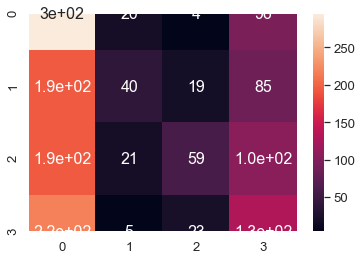

In [16]:
x = df.loc[:, ['PC_1', 'PC_2', 'PC_3']]
y = df.loc [:, 'price']

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.20, random_state=0)

n_bayes = GaussianNB()
n_bayes.fit(x_train,y_train)
predict = n_bayes.predict(x_test)

print(stats(y_test, predict))


precision
0.3906986732406395
recall
0.3273691186216037
f1 score
0.26780579503677554


None


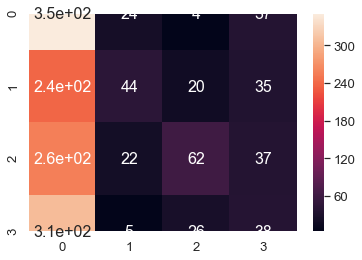

In [17]:
x = df.loc[:, ['PC_1', 'PC_2']]
y = df.loc [:, 'price']

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.20, random_state=0)

n_bayes = GaussianNB()
n_bayes.fit(x_train,y_train)
predict = n_bayes.predict(x_test)

print(stats(y_test, predict))

# K Means

In [18]:
data.columns

Index(['Unnamed: 0', 'id', 'host_response_time', 'host_response_rate',
       'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'neighbourhood_cleansed', 'zipcode', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'bed_type', 'price', 'security_deposit',
       'cleaning_fee', 'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'instant_bookable', 'cancellation_policy', 'senti_score', 'walk_score',
       'price_num'],
      dtype='object')

In [19]:
# Extract data for clustering and analysis 

clustering_data = data.loc[:,['senti_score','walk_score','number_of_reviews', 'host_total_listings_count', 
                              'host_is_superhost', 'price_num']]
clustering_data.head()

,senti_score,walk_score,number_of_reviews,host_total_listings_count,host_is_superhost,price_num
0,0.769675,97,199,1.0,1,3
1,0.796945,71,136,2.0,1,1
2,0.715800,97,17,10.0,1,1
3,0.763887,97,8,10.0,1,1
4,0.928354,97,28,2.0,0,4


In [20]:
# Normalizing data between 1 and 0 
clustering_data['walk_score'] = abs((data.walk_score - data.walk_score.min()) / (data.walk_score.max()))
clustering_data['number_of_reviews'] = abs((data.number_of_reviews - data.number_of_reviews.min()) / (data.number_of_reviews.max()))
clustering_data['host_total_listings_count'] = abs((data.host_total_listings_count - data.host_total_listings_count.min()) / (data.host_total_listings_count.max()))

clustering_data.head()

,senti_score,walk_score,number_of_reviews,host_total_listings_count,host_is_superhost,price_num
0,0.769675,0.75,0.272603,0.000683,1,3
1,0.796945,0.49,0.186301,0.001365,1,1
2,0.715800,0.75,0.023288,0.006826,1,1
3,0.763887,0.75,0.010959,0.006826,1,1
4,0.928354,0.75,0.038356,0.001365,0,4


In [21]:
clustering_norm_data = clustering_data[['walk_score', 'senti_score']]
clustering_norm_data.head()

,walk_score,senti_score
0,0.75,0.769675
1,0.49,0.796945
2,0.75,0.715800
3,0.75,0.763887
4,0.75,0.928354


In [22]:
# Helper function to count the number of samples in each cluster

def label_count(labels):

	lab_count = dict()

	for x in labels:
		if x in lab_count:
			lab_count[x] += 1
		else:
			lab_count[x] = 1

	print(lab_count)

	return



Clusters:
{1: 6835, 2: 340, 0: 369}


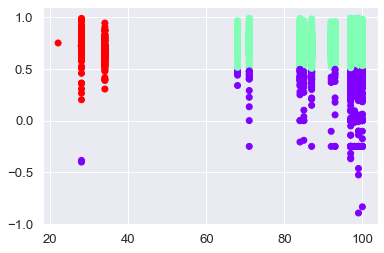

In [23]:
# generating the K-Means clusters and setting k = 4
n = 3

cluster = KMeans(n_clusters = n, random_state = 0).fit(clustering_norm_data)

labels = cluster.labels_
print("\n\nClusters:")
label_count(labels)
#data.loc[:,['province_id','variety_numerical','vintage']]

# Scatter plot of the normalized k-means clustering of points and price
plt.scatter(data.loc[:,'walk_score'], data.loc[:,'senti_score'], c=labels, cmap='rainbow')    
plt.show()

In [24]:
neighorhood = {"Mission":1, "South of Market":2, "Downtown/Civic Center":3, "Western Addition":4, "Castro/Upper Market":5, "Bernal Heights":6, "Haight Ashbury":7, "Noe Valley":8, "Nob Hill":9, "Outer Sunset":10, "Potrero Hill":11, "Inner Richmond":12, "Marina":13, "Bayview":14, "Russian Hill":15, "North Beach":16, "Inner Sunset":17, "Excelsior":18, "Outer Mission":19, "Financial District":20, "Outer Richmond":21, "Pacific Heights":22, "West of Twin Peaks":23, "Parkside":24, "Chinatown":25, "Ocean View":26, "Visitacion Valley":27, "Twin Peaks":28, "Glen Park":29, "Lakeshore":30, "Crocker Amazon":31, "Presidio Heights":32, "Seacliff":33, "Diamond Heights":34, "Golden Gate Park":35, "Presidio":36}

In [25]:
# Get a list of keys from dictionary which has the given value

def getKeysByValue(dictOfElements, valueToFind):
    listOfKeys = list()
    listOfItems = dictOfElements.items()
    for item  in listOfItems:
        if item[1] == valueToFind:
            listOfKeys.append(item[0])
    return  listOfKeys


In [26]:
# Helper function to get the top x in col from data from each cluster

# example usage: get_top_x_per_cluster(x, 'points', data, labels, n)
# x = the top number 'x' from each cluster
# col = the column with an attribute about the dataset
# data = the dataframe with the entire datset
# clusters = the clusters of each point
# n = the number of clusters formed using for k-means

def get_top_x_per_cluster(x, col, data, clusters, n):
    top_lists = [dict() for i in range(n)]
    c = 0
    
    for index, row in data.iterrows():
        i = clusters[c]
        c += 1
        if row[col] in top_lists[i]:
            top_lists[i][row[col]] += 1
        else:
             top_lists[i][row[col]] = 1
    
    print("\nTop", x, col, 'in each cluster')
    for i in range(n):
        print("\nCluster ", i)
        sorted_list = sorted(top_lists[i].items(), key=lambda kv: kv[1])
        sorted_list = list(reversed(sorted_list))
        for y in range(x):
            if(y < len(sorted_list)):
#                 print(sorted_list[y])
                print(getKeysByValue(neighorhood, sorted_list[y][0]), sorted_list[y][1])
    return
    

In [27]:
# Get top 3 neighborhoods from each cluster formed
get_top_x_per_cluster(3, 'neighbourhood_cleansed', data, labels, n)


Top 3 neighbourhood_cleansed in each cluster

Cluster  0
['Downtown/Civic Center'] 83
['South of Market'] 34
['Western Addition'] 31

Cluster  1
['Mission'] 696
['Western Addition'] 572
['South of Market'] 544

Cluster  2
['West of Twin Peaks'] 101
['Visitacion Valley'] 77
['South of Market'] 64


In [28]:
getKeysByValue(neighorhood, 3)

['Downtown/Civic Center']

In [29]:
x = df.loc[:, ['PC_1', 'PC_2', 'PC_3']]
y = df.loc [:, 'price']

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.20, random_state=0)

# Setting up the decision tree classifier. Using the principal components
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
predict = clf.predict(x_test)


precision
0.353126929633203
recall
0.3518886679920477
f1 score
0.3520346105566808


None


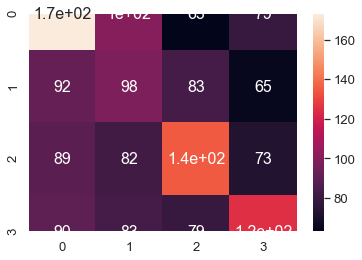

In [30]:
print(stats(y_test, predict))

In [31]:
# Logistic Regression
clustering_data['price_cat'] = 0
high = 0
for index, row in clustering_data.iterrows():
    if(row['price_num'] == 3) | (row['price_num'] == 4):
        clustering_data.loc[index,'price_cat'] = 1
        high += 1
print(str(high) + ', ' + str(1-(high/clustering_data.shape[0])))
clustering_data.head()

3771, 0.5001325556733829


,senti_score,walk_score,number_of_reviews,host_total_listings_count,host_is_superhost,price_num,price_cat
0,0.769675,0.75,0.272603,0.000683,1,3,1
1,0.796945,0.49,0.186301,0.001365,1,1,0
2,0.715800,0.75,0.023288,0.006826,1,1,0
3,0.763887,0.75,0.010959,0.006826,1,1,0
4,0.928354,0.75,0.038356,0.001365,0,4,1


0.5227995758218452


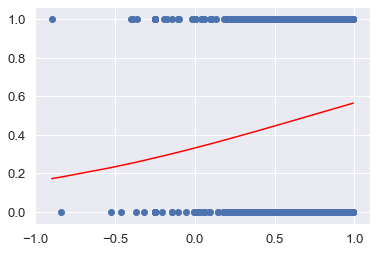


precision
0.5228547120240299
recall
0.5227995758218452
f1 score
0.5224739506336353




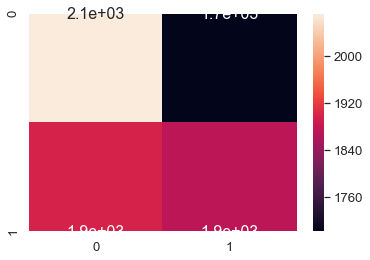

In [32]:
x = clustering_data.loc[:, ['senti_score']]
y = clustering_data.loc[:, ['price_cat']]

# x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.20, random_state=0)


reg = LogisticRegression(random_state=0, solver='sag', multi_class='ovr').fit(x, y)
print(reg.score(x,y))

predict = reg.predict(x)

plt.scatter(x, y)  
x = x.sort_values(by = 'senti_score')
plt.plot(x,reg.predict_proba(x)[:,1],color = 'red')
plt.show()
# print(stats())
stats(y, predict)

0.5483828207847296


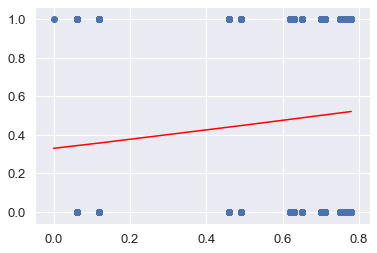


precision
0.5673590773795892
recall
0.5483828207847296
f1 score
0.5143177534990218




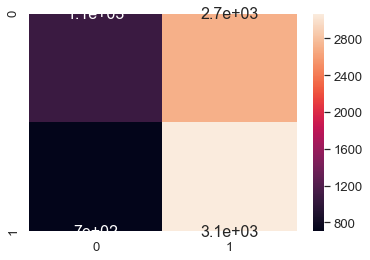

In [33]:
x = clustering_data.loc[:, ['walk_score']]
y = clustering_data.loc[:, ['price_cat']]

# x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.20, random_state=0)


reg = LogisticRegression(random_state=0, solver='sag', multi_class='ovr').fit(x, y)
print(reg.score(x,y))

predict = reg.predict(x)

plt.scatter(x, y)  
x = x.sort_values(by = 'walk_score')
plt.plot(x,reg.predict_proba(x)[:,1],color = 'red')
plt.show()
# print(stats())
stats(y, predict)

0.5719777306468717


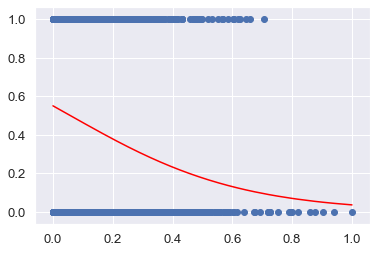


precision
0.5879937566024622
recall
0.5719777306468717
f1 score
0.5516602279570757




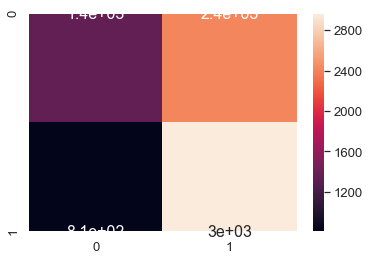

In [34]:
x = clustering_data.loc[:, ['number_of_reviews']]
y = clustering_data.loc[:, ['price_cat']]

# x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.20, random_state=0)


reg = LogisticRegression(random_state=0, solver='sag', multi_class='ovr').fit(x, y)
print(reg.score(x,y))

predict = reg.predict(x)

plt.scatter(x, y)  
x = x.sort_values(by = 'number_of_reviews')
plt.plot(x,reg.predict_proba(x)[:,1],color = 'red')
plt.show()
# print(stats())
stats(y, predict)

In [76]:
data2 = pd.read_csv('/Users/jiezou/Documents/GitHub/DataMining_project/v9/data_selected2.csv')
data2.head()

,Unnamed: 0,price,host_is_superhost,host_total_listings_count,host_has_profile_pic,zipcode,property_type,room_type,bathrooms,beds,bed_type,security_deposit,cleaning_fee,minimum_nights,instant_bookable,cancellation_policy,senti_score,walk_score
0,0,170.0,1,1.0,1,94117.0,1,1,1.0,2.0,1,100.0,100.0,1,1,2,0.769675,97
1,1,99.0,1,2.0,1,94131.0,2,2,1.0,1.0,1,0.0,10.0,1,0,1,0.796945,71
2,2,65.0,1,10.0,1,94117.0,1,2,4.0,1.0,1,200.0,50.0,32,0,1,0.715800,97
3,3,65.0,1,10.0,1,94117.0,1,2,4.0,1.0,1,200.0,50.0,32,0,1,0.763887,97
4,4,475.0,0,2.0,1,94117.0,2,1,1.5,2.0,1,0.0,225.0,4,0,2,0.928354,97


In [77]:
data2.drop(['Unnamed: 0'], axis=1, inplace=True)

In [78]:
data2.shape

(7544, 17)

In [79]:
#LinearRegression

In [80]:
from sklearn.linear_model import LinearRegression
X = data2.iloc[:, 1:].values
y=  data2["price"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train)
print(y_train)

[[  0.          92.           1.         ...   1.           0.2023
  100.        ]
 [  1.           2.           1.         ...   1.           0.87310161
   97.        ]
 [  0.           1.           1.         ...   1.           0.75135152
   98.        ]
 ...
 [  0.           1.           1.         ...   3.           0.76806923
   99.        ]
 [  1.           3.           1.         ...   1.           0.72410679
   98.        ]
 [  0.           3.           1.         ...   1.           0.296
   97.        ]]
[ 80. 335. 185. ... 185. 105. 300.]


In [81]:
# standardize the features
from sklearn.preprocessing import StandardScaler as ss
sc = ss()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
print(X_train_std)

reg = LinearRegression().fit(X_train_std, y_train)


[[-8.94198525e-01  3.61470640e-02  7.55928946e-02 ... -8.97566001e-01
  -3.56177236e+00  5.62705569e-01]
 [ 1.11831989e+00 -2.81482419e-01  7.55928946e-02 ... -8.97566001e-01
   1.01306440e+00  3.59887260e-01]
 [-8.94198525e-01 -2.85011635e-01  7.55928946e-02 ... -8.97566001e-01
   1.82734223e-01  4.27493363e-01]
 ...
 [-8.94198525e-01 -2.85011635e-01  7.55928946e-02 ...  1.25659240e+00
   2.96748290e-01  4.95099466e-01]
 [ 1.11831989e+00 -2.77953202e-01  7.55928946e-02 ... -8.97566001e-01
  -3.07355359e-03  4.27493363e-01]
 [-8.94198525e-01 -2.77953202e-01  7.55928946e-02 ... -8.97566001e-01
  -2.92274258e+00  3.59887260e-01]]


In [59]:
print(reg.score(X_train_std, y_train))

0.3287172698090203


In [62]:
#remove outliers
Q1 = data2.quantile(0.25)
Q3 = data2.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

price                        149.00000
host_is_superhost              1.00000
host_total_listings_count      9.00000
host_has_profile_pic           0.00000
zipcode                        9.00000
property_type                  1.00000
room_type                      1.00000
bathrooms                      0.50000
beds                           1.00000
bed_type                       0.00000
security_deposit             500.00000
cleaning_fee                 113.00000
minimum_nights                28.00000
instant_bookable               1.00000
cancellation_policy            1.00000
senti_score                    0.09317
walk_score                     7.00000
dtype: float64


In [64]:
data2_out = data2[~((data2< (Q1 - 3 * IQR)) |(data2 > (Q3 + 3 * IQR))).any(axis=1)]
data2_out.shape

(5033, 17)

In [127]:
from sklearn.linear_model import LinearRegression
X = data2_out.iloc[:, 1:].values
y=  data2_out["price"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
print(X_train)
print(y_train)


[[ 0.          3.          1.         ...  2.          0.66982917
  84.        ]
 [ 1.          1.          1.         ...  2.          0.71893214
  99.        ]
 [ 0.          3.          1.         ...  1.          0.7906
  99.        ]
 ...
 [ 0.          1.          1.         ...  1.          0.69813333
  84.        ]
 [ 1.          1.          1.         ...  2.          0.8018283
  85.        ]
 [ 0.          4.          1.         ...  1.          0.72555455
  99.        ]]
[199. 175. 220. ... 209. 150.  98.]


In [128]:
# standardize the features
from sklearn.preprocessing import StandardScaler as ss
sc = ss()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
print(X_train_std)
reg2 = LinearRegression().fit(X_train_std, y_train)

[[-1.0047809  -0.11919485  0.         ...  0.24475373 -0.88709522
  -1.38351959]
 [ 0.99524184 -0.44393143  0.         ...  0.24475373 -0.33136596
   0.71284004]
 [-1.0047809  -0.11919485  0.         ... -1.03549657  0.47974426
   0.71284004]
 ...
 [-1.0047809  -0.44393143  0.         ... -1.03549657 -0.56675917
  -1.38351959]
 [ 0.99524184 -0.44393143  0.         ...  0.24475373  0.60682201
  -1.24376228]
 [-1.0047809   0.04317344  0.         ... -1.03549657 -0.25641606
   0.71284004]]


In [123]:
print("after removing outliers:",reg.score(X_test_sdt, y_test))

after removing outliers: -1634534.0759405594


In [116]:
input_f=[]
for i in range((data2_out.shape[1]-1)):
    print(data2_out.columns.values[i+1])
    input_f.append(input())

host_is_superhost
1
host_total_listings_count
1
host_has_profile_pic
1
zipcode
1
property_type
1
room_type
1
bathrooms
1
beds
1
bed_type
1
security_deposit
1
cleaning_fee
1
minimum_nights
1
instant_bookable
1
cancellation_policy
1
senti_score
1
walk_score
1


In [117]:
a = np.array(input_f)
b = a.astype(np.float) 
b = b.reshape(1, -1)
print(b)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


In [120]:
sc = ss()
x_input= sc.fit_transform(b)
reg2.predict(x_input)

array([185.62560318])

In [133]:
#SVM
from sklearn.svm import LinearSVC
def makeclass(y):
    new_y = []
    for i in y:
        if i<50:
            new_y.append(0)
        if i>=50 and i<100:
            new_y.append(1)
        if i>=100 and i<150:
            new_y.append(2)
        if i>=150 and i<200:
            new_y.append(3)
        if i>=200 and i<250:
            new_y.append(4)
        if i>=250 and i<300:
            new_y.append(5)
        if i>=300:
            new_y.append(6)
    return np.asarray(new_y)

dict_price = {0:50,1:100,2:150,3:200,4:250,5:300,6:350}

class_y = makeclass(y_train)

cls = LinearSVC().fit(X_train,class_y)
cls.score(X_train,class_y)

0.29809220985691576

In [140]:
class_y_test = makeclass(y_test)
print('cls.score of testing:',cls.score(X_test,class_y_test))

cls.score of testing: 0.21573301549463647


In [141]:
cls = LinearSVC().fit(X_train_std,class_y)
print('after standardize the features,cls.score of training:',cls.score(X_train_std,class_y))
print('after standardize the features,cls.score of testing:',cls.score(X_test_std,class_y_test))

after standardize the features,cls.score of training: 0.4379968203497615
after standardize the features,cls.score of testing: 0.4171632896305125


In [142]:
dict_price[cls.predict(np.asarray(input_f).astype(np.float).reshape(1,-1))[0]]

350